In [48]:
import pandas as pd 
import matplotlib.pyplot as plot

In [14]:
df = pd.read_csv('major_labels_top_200.csv', index_col=False)

In [15]:
pd.set_option('display.max_rows', None)

In [18]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [64]:
grouped_df = df.groupby(['major label'], as_index= False)['Streams'].sum()
grouped_df

,major label,Streams
0,Roc Nation,10438778
1,Small Label/Independent,57048476
2,Sony Music Entertainment,114027160
3,Universal Music Group,171502542
4,Walt Disney Records,31916682
5,Warner Music Group,87013421


In [65]:
grouped_df.sort_values('Streams', ascending=False, inplace = True)

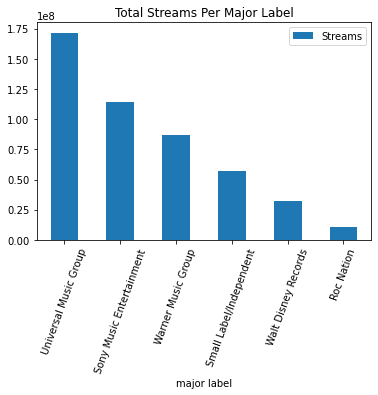

In [89]:
grouped_df.plot.bar(x="major label", y="Streams", rot=70, title="Total Streams Per Major Label")

plot.savefig('Total Streams Per Major Label V2.png', bbox_inches='tight')
plot.show(block=True)

In [95]:
grouped_count = df.groupby('major label', as_index=False)['Track Name'].count()

In [100]:
grouped_count.sort_values('Track Name', ascending = False, inplace = True)

In [101]:
grouped_count

,major label,Track Name
3,Universal Music Group,77
2,Sony Music Entertainment,47
5,Warner Music Group,36
1,Small Label/Independent,27
4,Walt Disney Records,8
0,Roc Nation,5


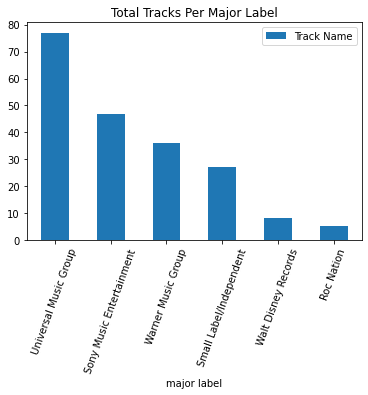

In [103]:
grouped_count.plot.bar(x="major label", y="Track Name", rot=70, title="Total Tracks Per Major Label")

plot.savefig('Total Tracks Per Major Label V2.png', bbox_inches='tight')
plot.show(block=True)

In [104]:
grouped_ratio = pd.merge(
    grouped_df,
    grouped_count,
    how="inner",
    on='major label',
)

In [106]:
grouped_ratio['ratio'] = grouped_ratio['Streams'] / grouped_ratio['Track Name']

In [111]:
grouped_ratio.sort_values('ratio', ascending = False , inplace = True)

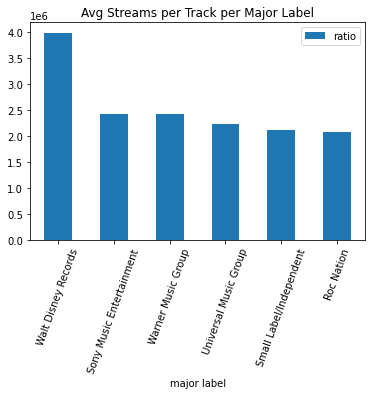

In [112]:
grouped_ratio.plot.bar(x='major label', y='ratio', rot=70, title = 'Avg Streams per Track per Major Label')
plot.savefig('Avg Streams per Track per Major Label', bbox_inches='tight')
plot.show(block=True)

In [114]:
grouped_ratio_only_majors_majors = grouped_ratio.drop([1, 4, 5], axis = 0)

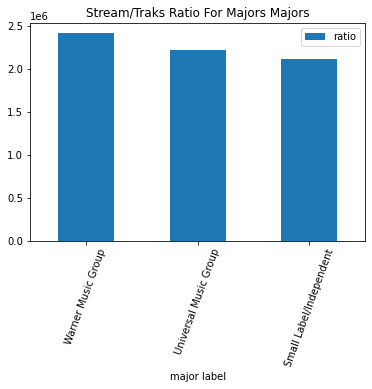

In [117]:
grouped_ratio_only_majors_majors.plot.bar(x='major label', y='ratio', rot=70, title = 'Stream/Traks Ratio For Majors Majors')
plot.savefig('Stream_Traks Ratio For Majors Majors', bbox_inches = 'tight')
plot.show(block=True)

In [118]:
grouped_ratio_only_majors_majors

,major label,Streams,Track Name,ratio
2,Warner Music Group,87013421,36,2.417039e+06
0,Universal Music Group,171502542,77,2.227306e+06
3,Small Label/Independent,57048476,27,2.112907e+06


SO SONY HAS A BETTER RATIO OF STREAMS PER TRACKS THAN WARNER AND PUT OUT MORE TRACKS THAN WARNER THUS SONY DO A BETTER JOB THAN WARNER. AND THE STRATEGY OF UNIVERSAL IS TO PUT AS MUCH MUSIC OUT THERE AS POSIBLE EVEN THOUGH THEY MAKE LESS STREAMS (OR BECAUSE THEY KNOW THEY MAKE LESS STREAMS) PER TRACK. IN ANY CASE UNIVERSAL MAKES MORE STREAMS THUS MORE MONEY BUT THAT'S REVENU NOT PORFIT AND UNFORTUNATLY IT WOULD BE REALLY HARD FOR US TO COMPUTE HOW MUCH THEY SPEND IN MARKETING, RECORDING, ADVANCES ETC FOR THE ARTIST ETC PER TRACK, WHICH ON TOP OF THAT MUST BE VERY VARIABLE FROM A TRACK TO ANOTHER. WHAT WE CAN DO THOUGH IS TO CHECK HOW MANY ARTISTS ARE SIGNED TO EACH MAJOR AND MAY BE, IF TWO MAJORS HAS THE SAME NUMBER OF ARTISTS, UNIVERSAL ARTISTS JUT PUT MORE MUSIC OUT WHICH SOULDN'T IMPACT THAT MUCH THE COST OF PRODUCTION AND WOULD MEAN THAT UNIVERSAL HAS BETTER CONTRACTS FOR UNIVERSAL. 
*THIS ENTIRE ANALYSIS IS BASED ON THIS TOP 200 OF THIS PARTICUALR WEEK ONLY*

SEE POSTGRES FOLDER FOR THE QUERY 